# Assignment 1:  data analysis with pandas
<span style="color: pink;">Jessica Reyes</span> 

Note:  in this assignment do not use pandas functionality that we haven't covered in class unless explicitly suggested.

## Part 1: tipping data

Your task is to analyze data related to tipping at restaurants.

First we'll read the data into a pandas data frame:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data_url = "https://github.com/mwaskom/seaborn-data/raw/master/tips.csv"
data = pd.read_csv(data_url)
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


The information provided in this data includes the following:  

* **total_bill** - the bill before tip
* **tip** - amount paid as tip
* **sex** - the gender of the person paying the bill
* **smoker** - whether the person paying the bill is a smoker
* **day** - day of the week
* **time** - whether the meal was "Lunch" or "Dinner".
* **size** - how many people were part of the party

In this part of the assignment we will look for tendencies of people when tipping.

Here are your tasks:

#### Tip amount

* Compare the avergae tip amount between lunch and dinner.  Use the `mean()` method of a `Series/DataFrame`.  In which meal do you observe a larger tip?

In [6]:
# average tip amount for lunch vs dinner
mean_lunch = data[data['time'] == 'Lunch']['tip'].mean()
mean_dinner = data[data['time'] == 'Dinner']['tip'].mean()
print('Lunch: ', round(mean_lunch,2))
print('Dinner: ', round(mean_dinner,2))
print('Dinner has the larger tips!')

Lunch:  2.73
Dinner:  3.1
Dinner has the larger tips!


#### Tip percentage

* You should observe a larger tip amount for dinner.  However, is this really the right question to ask?  Dinners tend to cost more, so it is to be expected that the tip amount will be larger.  But is the tip percentage much different?  To answer this question, add another column called `tip_percentage` to the ``DataFrame`` which contains the tip percentage (tip amount / total_bill) * 100.  With that added information, what were the smallest and largest tip percentages?  Use the `min` and `max` method to determine that.

In [7]:
# add tip percentage column and determine min / max amounts
data['tip_percentage'] = data['tip'] / data['total_bill']
min_tip = data['tip_percentage'].min()
max_tip = data['tip_percentage'].max()
print('Min: ', round(min_tip*100,2))
print('Max: ', round(max_tip*100,2))

Min:  3.56
Max:  71.03


#### Tip percentage in lunch vs dinner 

* Next, compare the average tip percentage between lunch and dinner.  You should observe a pretty small difference.

In [8]:
# average tip percentage for lunch vs dinner
avg_tip_percentage = data.groupby('time')['tip_percentage'].mean()
print(avg_tip_percentage*100)

time
Dinner    15.951779
Lunch     16.412793
Name: tip_percentage, dtype: float64


#### Tip by gender

* Compare the average tip percentage given by gender.  Also create a histogram that compares the distribution of tips given across genders.
DataFrames have a [histogram](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) method for this task.

sex
Female    16.649074
Male      15.765055
Name: tip_percentage, dtype: float64


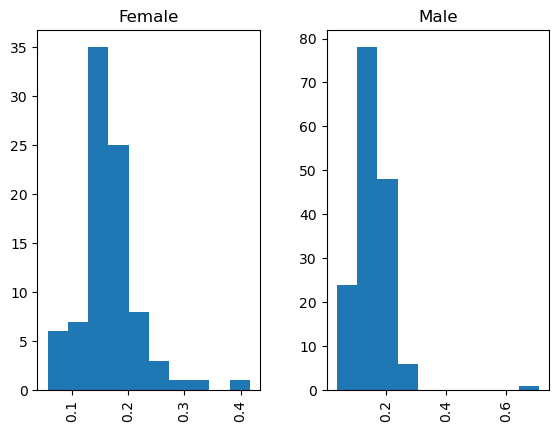

In [13]:
# average tip by gender
avg_tip_gender = data.groupby('sex')['tip_percentage'].mean()
print(avg_tip_gender*100)
histograms = data.hist(column='tip_percentage', by='sex')

## Part 2:  baby names in Colorado

The US Social Security Administration has been keeping track of baby names in the US since the late 1800's.  In this part of the assignment we will track some trends in this data.
This data is collected from applications for social security cards; the original version is available [here](https://catalog.data.gov/dataset/baby-names-from-social-security-card-applications-national-data).  We will use a smaller subset of data found below.

We'll focus on data collected in Colorado from 1910.  The first few lines of the data file are as follows:

```
CO,F,1910,Mary,193
CO,F,1910,Helen,112
CO,F,1910,Dorothy,87
CO,F,1910,Ruth,68
CO,F,1910,Margaret,67
```

The first column specifies the state (Colorado), the second column is the gender (F/M), the third column is the year (1910-2018), and the last column is the count of Colorado babies that were given that name during that year.

First, let's load the data straight into the Jupyter notebook:

#### Reading in the data

We'll use the pandas `read_csv` function to read the data:

In [10]:
data_url = 'https://www.cs.colostate.edu/~asa/courses/dsci235/spr21/data/co.txt'
names = pd.read_csv(data_url)
names.head()

,CO,F,1910,Mary,193
0,CO,F,1910,Helen,112
1,CO,F,1910,Dorothy,87
2,CO,F,1910,Ruth,68
3,CO,F,1910,Margaret,67
4,CO,F,1910,Frances,56


As you can see, this does not give the desired result:  the first row was interpreted as the column names for this dataset.
Modify the command so that the first row is read correctly and columns are given the following descriptive names: 'state', 'gender', 'year', 'name', and 'count'.
You can refer to the [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) documentation on how to do that.

In [11]:
# code for reading the data into a DataFrame with columns named 
# appropriately
data_url = 'https://www.cs.colostate.edu/~asa/courses/dsci235/spr21/data/co.txt'
names = pd.read_csv(data_url, header=None, names=['state', 'gender', 'year', 'name', 'count'])
names.head()

,state,gender,year,name,count
0,CO,F,1910,Mary,193
1,CO,F,1910,Helen,112
2,CO,F,1910,Dorothy,87
3,CO,F,1910,Ruth,68
4,CO,F,1910,Margaret,67


#### Most popular name

* What was the most popular male baby name in 2018?  What was the most popular female baby name in 2018?  You can use the method `idxmax`.


In [11]:
idmax_male = names[(names['year'] == 2018) & (names['gender'] == 'M')]['count'].idxmax()
idmax_female = names[(names['year'] == 2018) & (names['gender'] == 'F')]['count'].idxmax()
print('Male: ', names.iloc[idmax_male]['name'])
print('Female: ', names.iloc[idmax_female]['name'])

Male:  Liam
Female:  Olivia


#### Top 5 most popular names

* What were the five most popular baby names in 2018? You can use a DataFrame's `nlargest` or `sort_values` methods.

In [12]:
sort_values = names[(names['year'] == 2018)].sort_values(by='count', ascending=False)
print(sort_values.head(5))

       state gender  year     name  count
106328    CO      M  2018     Liam    331
58637     CO      F  2018   Olivia    325
106329    CO      M  2018   Oliver    274
106330    CO      M  2018  William    266
58638     CO      F  2018     Emma    266


#### Unisex names

* First, let's define a name as being *popular* if its count is above some threshold.
Find names that are popular in both genders in the same year.
Compute this for names given in 2018, and use a threshold of 30 to define popularity.  As a hint, on ways to solve this, the pandas [isin](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html) or [duplicated](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html) DataFrame methods can be used for this task (think how they might be useful!) 

In [13]:
popular_names = names[(names['year'] == 2018) & (names['count'] > 30)]
popular_names_male = popular_names[popular_names['gender'] == 'M']
popular_names_female = popular_names[popular_names['gender'] == 'F']
unisex_names = popular_names[popular_names['name'].isin(popular_names_male['name']) & 
                             popular_names['name'].isin(popular_names_female['name'])]

print(unisex_names)

       state gender  year     name  count
58734     CO      F  2018  Emerson     51
58741     CO      F  2018  Charlie     47
58765     CO      F  2018    Rowan     42
58796     CO      F  2018   Parker     34
58808     CO      F  2018    Blake     31
106421    CO      M  2018    Rowan     75
106450    CO      M  2018   Parker     55
106517    CO      M  2018  Emerson     35
106523    CO      M  2018  Charlie     34
106538    CO      M  2018    Blake     31


#### Counts over time

* Choose a unisex name and create a DataFrame that summarizes its count over time separately for males and females between 1910 and 2018.  Plot the data using the `plot` method of a DataFrame (see [DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) for details) or the Matplotlib [plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) function.  Matplotlib offers more flexibility, and might help you more easily get the result you are looking for.

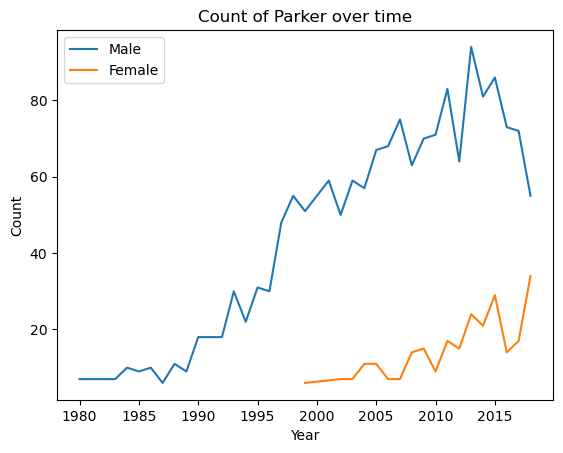

In [14]:
from os import name
selected_name = "Parker"
name_data = names[(names['name'] == selected_name) & (names['year'] >= 1910) & (names['year'] <= 2018)]
male_data = name_data[name_data['gender'] == 'M']
female_data = name_data[name_data['gender'] == 'F'] 
plt.plot(male_data['year'], male_data['count'], label='Male')
plt.plot(female_data['year'], female_data['count'], label='Female')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title(f'Count of {selected_name} over time')
plt.legend()
plt.show()

#### Increase in popularity

* Which name has shown the largest increase in popularity from 2017 to 2018?  Do this for both men and women.  This will require you to subtract two DataFrame or Series objects.  If a name is present in one year but not the other, this can lead to the appearance of `NaN`s.  To address this issue we suggest to use the [subtract](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.subtract.html) method of a DataFrame/Series object.


In [15]:
# increase in popularity
names_2017 = names[names['year'] == 2017].groupby(['name', 'gender'])['count'].sum()
names_2018 = names[names['year'] == 2018].groupby(['name', 'gender'])['count'].sum()
increase = names_2018.subtract(names_2017, fill_value=0)
max_increase = increase.idxmax()
max_male_name = increase[increase.index.get_level_values('gender') == 'M'].idxmax()
max_female_name = increase[increase.index.get_level_values('gender') == 'F'].idxmax()
print(max_male_name)
print(max_female_name)

('Nolan', 'M')
('Olivia', 'F')


#### Earliest occurrence of a name

* What year did "Taylor" make its first appearance as a female name?  As a male name?  You can use the fact that the file is sorted by year.

In [16]:
taylor_female = names[(names['name'] == 'Taylor') & (names['gender'] == 'F')]['year'].min()
taylor_male = names[(names['name'] == 'Taylor') & (names['gender'] == 'M')]['year'].min()
print('Taylor female: ', taylor_female)
print('Taylor male: ', taylor_male)

Taylor female:  1981
Taylor male:  1968


### Submission

Submit your assignment as a Jupyter notebook via Canvas.  

### Grading 

Here is what the grade sheet will look like for this assignment. 

```
Grading sheet for assignment 1

Tips data (40 pts)

  Tip amount at lunch and dinner (10 pts)
  Tip-percentage column (10 pts)
  Comparison of tip percentage between lunch and dinner (10 pts)
  Comparison of tip percentage by gender (10 pts)

Baby names (60 pts)

  Read the data and store it in a DataFrame (10 pts)
  Most common baby name (5 pts)
  Top 5 baby names (5 pts)
  Unisex names (10 pts)
  Counts over time (10 pts)
  Increase in popularity (10 pts)
  Earliest occurrence (10 pts)

```

Throughout the course, use of for loops is discouraged.  **Points will be taken off for using for loops unless explicitly allowed.**  pandas provides tools for accomplishing things without the need for Python loops.
